# Dataset Introduction

The **Mall Customer Dataset** was sourced from **Kaggle** for this project.  
It contains **200 customer records** with demographic and spending-related attributes.

### Features:
- **CustomerID** – Unique customer identifier  
- **Gender** – Male/Female  
- **Age** – Customer age  
- **Annual Income (k$)** – Yearly income  
- **Spending Score (1–100)** – Spending behavior score  

This dataset is well-suited for **customer segmentation using clustering techniques**, as it provides clean numerical features that help identify meaningful customer groups.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Data Inspection

In [5]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape
df.info()
df.isnull().sum()
df.duplicated().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Dataset Overview & Summary

- The dataset contains **200 customer records** with **5 features**.
- There are **no missing values** and **no duplicate entries**.
- Most features are numerical but **Gender** is the only categorical column.
- Customer ages range from **18 to 70 years**.
- Annual income varies from **15k to 137k USD** it showes a wide income distribution.
- Spending scores is in of **1 to 99** it indicates a diverse customer spending behavior.

## Data Preprocessing

The numerical features (Age, Annual Income, and Spending Score) were standardized using StandardScaler to ensure equal contribution of all features during distance-based clustering.

In [10]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

## Clustering
The optimal number of clusters was determined using the Elbow Method.  
K-Means clustering was then applied with **K = 5**, and a cluster label was assigned to each customer.

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\jaina\Downloads\anacondaapp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaina\Downloads\anacondaapp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaina\Downloads\anacondaapp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaina\Downloads\anacondaapp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

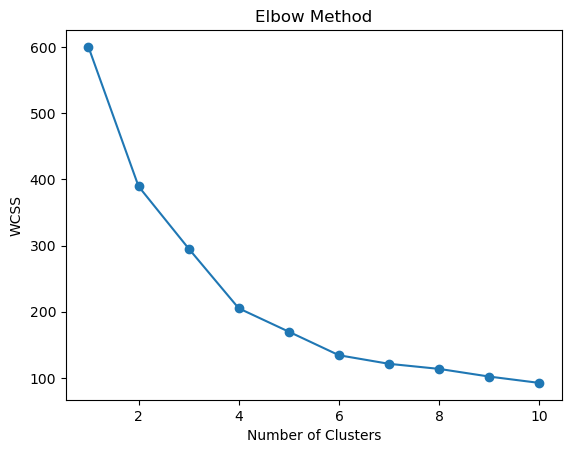

In [12]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

C:\Users\jaina\Downloads\anacondaapp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


## 2D Scatter Plot using PCA 
## Visualization

PCA was used to reduce the data to two dimensions for visualization.  
Scatter plots, pair plots, and cluster centroids were analyzed to better understand customer segments.


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

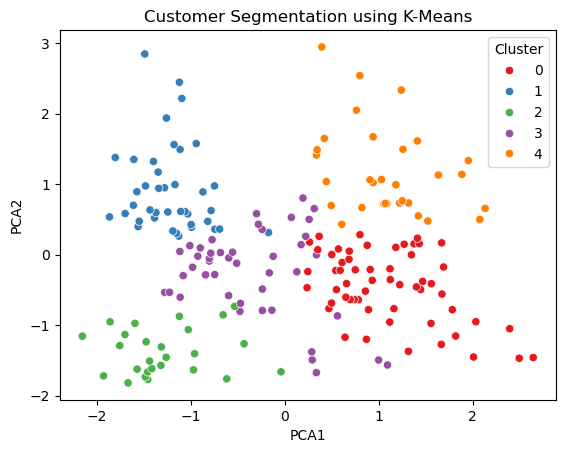

In [16]:
import seaborn as sns
sns.scatterplot(x='PCA1',y='PCA2',hue='Cluster',data=df,palette='Set1')
plt.title('Customer Segmentation using K-Means')
plt.show()

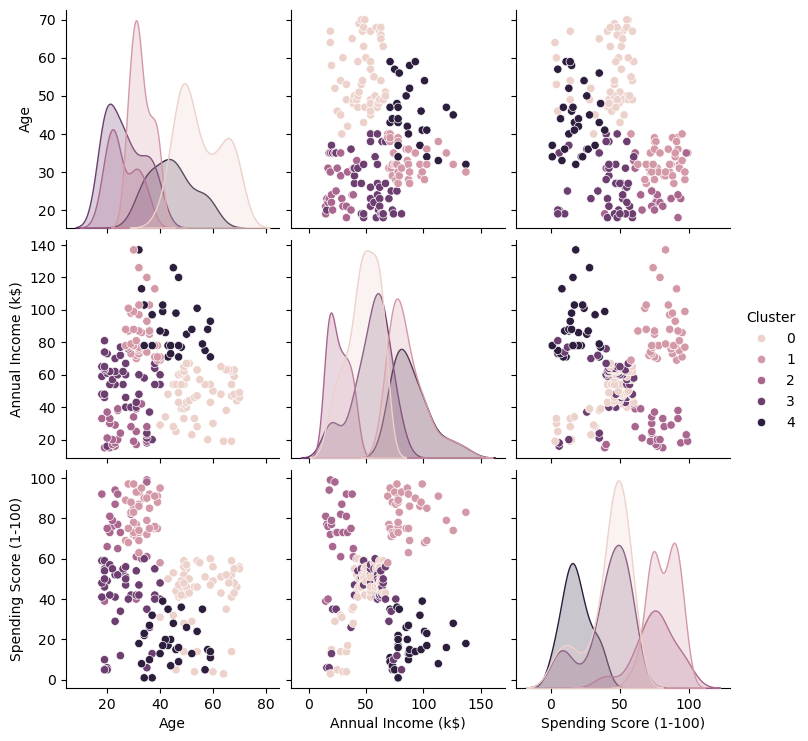

In [17]:
sns.pairplot(df,hue='Cluster',vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()


In [18]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids,columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
centroid_df

,Age,Annual Income (k$),Spending Score (1-100)
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871
